In [1]:
import utils
import qiskit
import qiskit_aer
import numpy as np
from math import log
import qiskit.visualization
import matplotlib.pyplot as plt

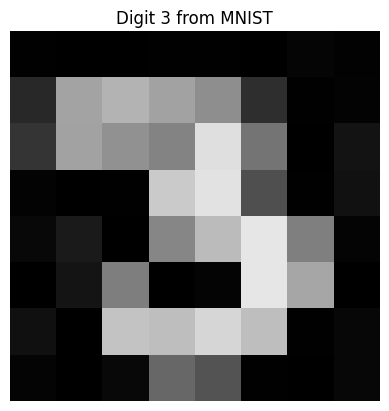

In [2]:
image = utils.plot_image('images/three_8by8.jpg', 'Digit 3 from MNIST')

In [ ]:
def equal_superposition(circ: qiskit.QuantumCircuit, start: int, end: int):
    for idx in range(start, end): 
        circ.h(idx)
        
def iterate(circ: qiskit.QuantumCircuit, padding: int, current_state: str, next_state: str):
    n = len(current_state)
    
    # Indices we must apply an X gate to go from current_state to next_state 
    #   - We reverse the state strings because we set the coordinates qubits in the circuit
    #       in descending order.
    x_targets = np.array([idx + padding for idx in range(n) 
                          if current_state[::-1][idx] != next_state[::-1][idx]])

    # Example
    # 1110 -> 1111
    #   if we don't reverse the strings we get:
    #   x_targets = [3]
    #   thus we will apply the X gate on the fourth qubit.
    #   but this is not what we want, we should apply it to the first qubit.
    #   think little endian vs big endian
    
    if x_targets.size > 0:
        circ.x(x_targets)

def pixel_encoding(circ: qiskit.QuantumCircuit, control: list, intensity: str):
    for idx, val in enumerate(intensity[::-1]):
        if int(val):
            circ.mcx(control_qubits=control,
                     target_qubit=idx)
            
    

In [ ]:
def construct_brqi():
    pass

In [ ]:
flat_ang_rep = utils.get_angle_representation(image,
                                                min_val=0,
                                                max_val=255)

n = int(log(image.shape[0], 2))

idx_reg = qiskit.QuantumRegister(2 * n, 'Index')
intensity_reg = qiskit.QuantumRegister(8, "Intensity") # Color intensity 2^8 -> (0, 255)
creg = qiskit.ClassicalRegister(2 * n + 8, 'bits')
neqr_circuit = qiskit.QuantumCircuit(intensity_reg, idx_reg, creg)

In [ ]:
construct_brqi(neqr_circuit,  image)
neqr_circuit.draw(output='mpl')